#<div align="center"> **Predicting house prices with machine learning and deep learning**



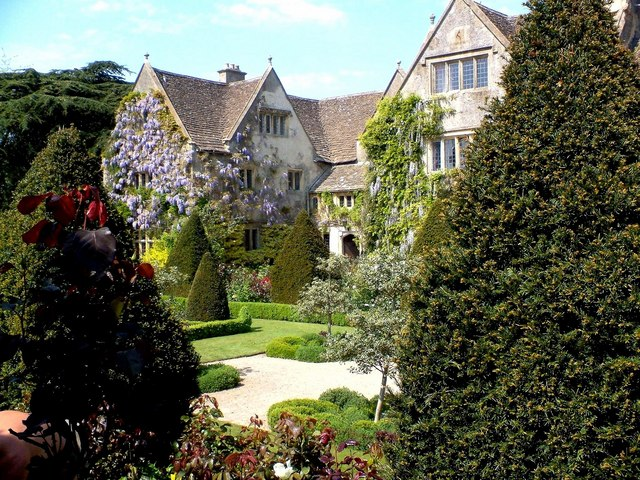

## Contents
[1. Introduction](#1) 

[2. Importing Libraries](#2) 

[3. A look at the data](#3) 

[4. Checking Null values](#4) 

[5. Correlation](#5) 

[6. Checking price](#6) 

[7. Map](#7) 

[8.  Machine Learning](#8) 

[9. Deep learning ](#9) 

# <div align="center">  **1.  Introduction** <a id="1"></a>

Thank you for coming to my first kernel at Kaggle. Please if you find any errors or have advice for me, please post it in the comments. 
The aim of this kernel is to predict house prices with machine learning methods like linear regression, SVR, Lasso regression and deep learning. 





 # **A few assumptions of linear regression are:**
 

1. Linearity
    
2. Constant Variance
    
3. Normality
    
4. No auto-correlation



    
# **Explanation of the different columns:**

***Date***: Date when the house was sold.

***Price***: Price when the house was sold.

***Bedrooms***: Number of bedrooms.

***Bathrooms***: Number of Bathrooms.

***Sqft_living***: Square footage of appartements.

***Sqft_lot***: Square footage of land space.

***Floors***: Number of floor.

***Waterfront***: 

***View***: Index from 0 - 4 how good the view is.

***Condition***: Index from 1 - 5.

***Grade***: Index from 1 - 13.

***Sqft_above***: Square footage of upstairs.

***Sqft_basement***: Square footage below ground level.

***Yr_built***: When whe house was built.

***Yr_renovated***: Last renovation year. 

***Zipcode***: The zipcode.

***Lat***: The Lattitude.

***Long***: The longitude.

***Sqft_living15***: Square footage of interior housing living space for the nearest 15 neighbors.

***Sqft_lot15***: Square footage of the land lots of the nearest 15 neighbors.




# <div align="center">  **2.  Importing libraries** <a id="2"></a>
    

In [ ]:
# normal libraries
import pandas as pd
import numpy as np

# importing graph libraries 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

# With Gridspec you can make static dashboards
from matplotlib.gridspec import GridSpec


# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import norm
from scipy.stats import probplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# warning libraries
import warnings
warnings.filterwarnings("ignore")


# Maps
import folium

# Very powerfull plugin for maps
from folium.plugins import FastMarkerCluster, HeatMap


# Deep leerning imports
import tensorflow as tf
from tensorflow.keras.models import Sequential # for creating the model
from tensorflow.keras.layers import Dense # for creating the layers


#  Metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score







# <div align="center">  3. A look at the data <a id="3"></a>

In [ ]:
# importing the dataframe 
df = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

In [ ]:
df.head()

In [ ]:
lol = df["condition"].value_counts().reset_index().sort_values(by = "condition", ascending = False)
values = lol["condition"]
index = ["3","4","5","2","1"]
fig = px.pie(lol, values=values, names=index,color_discrete_sequence=['rgb(150,0,0)','rgb(100,40,120)','rgb(200,77,50)'],hole=0.7)
fig.update_layout(title = " House conditions")
fig.show()




In [ ]:
shape = df.shape
print(f"there are {shape[0]} rows and {shape[1]} columns in the dataframe")

In [ ]:
# dropping the id column
df_geo = df[["zipcode","lat","long"]]
df.drop(["id","zipcode","lat","long","date"], axis = 1 , inplace=True)

# <div align="center">  4. Checking Null values <a id="4"></a>

In [ ]:
# checking the null values in the dataframe


Sum = df.isnull().sum()
Percentage = (df.isnull().sum()/df.isnull().count())
df_null= pd.concat([Sum,Percentage], axis =1 , keys = ["Sum","Percentage"])
df_null.style.background_gradient("Greens")


In [ ]:
# after cleaning 
after_clean = df.shape
print(f" After cleaning there are {after_clean[0]} rows and {after_clean[1]} columns in this dataframe")

# <div align="center">  5. Correlation <a id="5"></a>

In [ ]:
#check correlation in features
#dropping the second part of the heatmap
drop = np.zeros_like(df.corr())
drop[np.triu_indices_from(drop)] = True
sns.heatmap(df.corr(), annot = True, fmt = ".1f", cmap = "Blues", linewidth = 1, mask = drop);

plt.title("Correlation");
sns.set_style("white")

In [ ]:
# Checking the columns that have the most correlation with the column price
df_corr = df.corr().iloc[0,:].sort_values(ascending=False).reset_index()
df_corr = df_corr[df_corr["price"] < 1]
sns.barplot(x = "index", y = "price", data = df_corr);
plt.xticks(rotation = 90)
plt.title("Correlation with price");
plt.grid(True)
sns.set_style("dark")

In [ ]:
# checking more correlations
fig = plt.figure(figsize=(15,15))
ax =fig.add_subplot(2,2,1, projection = "3d")
ax.scatter(df["sqft_living"], df["grade"],df["price"], color = "red");
ax.set_title("Correlation between sqft_living, grade and price ");

# <div align="center">  6. Checking price <a id="6"></a>

In [ ]:
log = np.log1p(df["price"])



fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1);

sns.distplot(df["price"], fit = norm, ax = ax1);
sns.distplot(log, fit = norm, ax = ax2);
probplot(df["price"], plot=ax3);
probplot(log, plot=ax4);

In [ ]:
# checking price

sns.set_style("dark")


fig = plt.figure(constrained_layout= True);

gs = GridSpec(3,3, fig)

ax = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
ax3 = fig.add_subplot(gs[2,:])

count= df["price"].count()
sumis = df["price"].sum()
skew = round(df["price"].skew(),2)
kurt = round(df["price"].kurt(),2)


mean_bedrooms = df["bedrooms"].mean()
mean_bathrooms = df["bathrooms"].mean()
mean_floors = df["floors"].mean()


together = {"name":["bedrooms","bathrooms","floors"],"averange":[mean_bedrooms,mean_bathrooms,mean_floors]}


df2 = pd.DataFrame(together)

ax.set_title("Figures of price", fontsize=40, pad = 10, color='dimgrey' )
ax.text(0.25, 0.43, f' $ {sumis}', fontsize=30, color='mediumseagreen', ha='center',        
        bbox=dict(facecolor='navy', alpha=0.1, pad=10, boxstyle='round, pad=.7'))
ax.text(0.25, 0.81, 'Total sum of price',color='darkslateblue', fontsize=20, ha='center')


ax.text(0.50, 0.43, f'{skew}', fontsize=40, color='mediumseagreen', ha='center',
          bbox=dict(facecolor='navy', alpha=0.1, pad=10, boxstyle='round, pad=.4'))

ax.text(0.50, 0.81, 'The skew of price:',color='darkslateblue', fontsize=20, ha='center')


ax.text(0.75, 0.43, f'{kurt}', fontsize=40, color='mediumseagreen', ha='center',
          bbox=dict(facecolor='navy', alpha=0.1, pad=1, boxstyle='round, pad=.4'))
ax.text(0.75, 0.81, 'The kurtosis of price:',color='darkslateblue', fontsize=20, ha='center')

ax2.set_title("Boxplot of price", fontsize=20, pad = 10, color='dimgrey' )

sns.barplot(x = df2["name"], y = df2["averange"], ax = ax3,  palette='YlGnBu')
sns.boxplot(df["price"],ax = ax2)

ax3.set_title("Averange of Bath, bedrooms and floors", fontsize=20, pad = 10, color='dimgrey' )

ax.axis("off");




In [ ]:
fig =  go.Figure(go.Bar(x= df2["name"], y = round(df2["averange"],2),
                       marker={'color': df2['averange'],
                              'colorscale': 'Viridis'},
                        text=round(df2['averange'],2),
                        textposition =  "outside"
                       ))


fig.update_layout(title_text = "Nicer chart of the averange Bath, bedrooms and floors")


There are at averange 3.37 bedrooms, 2.11 Bathrooms and 1.49 floors in most of the houses



# <div align="center">  7. Map  <a id="7"></a>

This map is very cool and very easy to make.
1. First import folium and from folium.plugins import FastMarkerCluster.
2. Make 2 variables with lat long.
3. Zip the variables together in a list.
4. Create a map {map1 = folium.Map(location=[47.5112,-122.257], zoom_start=10) } Check in the dataframe what the most common lat and long is.
5. Use the plugin FastMarkerCluster and set it to the zipped list and add it to the map.


Most houses were sold in Northgate, Ballard and Maple Leaf


In [ ]:
lat = df_geo["lat"] 
long = df_geo["long"]

cordinates = list(zip(lat,long))

map1 = folium.Map(location=[47.5112,-122.257], zoom_start=10)


FastMarkerCluster(data=cordinates).add_to(map1)

map1

In [ ]:
map2 = folium.Map(
    location=[47.5112,-122.257], 
    zoom_start=10.0)

HeatMap(name='Houses',
    data=cordinates,
    radius=10,
    max_zoom=13
).add_to(map2)


map2

# <div align="center">  8. Machine Learning <a id="8"></a>

In [ ]:

# A new Dataframe to track all the scores of all the models
scores = pd.DataFrame({"Model":[],
                       "Cross_vall_score":[], 
                       "Mean_squared_error":[],
                       "R2":[]})

In [ ]:
df_new = df.copy()
df_base = df.copy()

In [ ]:
X = df_base.drop(["price"], axis= 1)
y = df_base["price"]

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin = LinearRegression()
lin.fit(X_train,y_train)
predict = lin.predict(X_test)


In [ ]:

score_bass = round(np.sqrt(mean_squared_error(predict,y_test)),2)
base_r2=round(r2_score(predict,y_test),2)
Base_cross = round(cross_val_score(lin,X_train,y_train,cv=5).mean(),2)


scores.loc[0] = ["Simple_linear", Base_cross,score_bass,base_r2]
print(scores)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X1 = df_new.drop(["price"], axis= 1)
y1 = df_new["price"]

In [ ]:
 X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size= 0.25, random_state = 42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [ ]:
lin = LinearRegression()
lin.fit(X_train1,y_train1)
predict1 = lin.predict(X_test1)
cross_vall_scaler= round(cross_val_score(lin,X_train1,y_train1,cv=5).mean(),2)
score_scaler =round(np.sqrt(mean_squared_error(predict1,y_test1)),2)
r2_scaler= round(r2_score(predict1,y_test1),2)

In [ ]:
r = scores.shape[0]
scores.loc[r] = ["Simple_linear_scaler",cross_vall_scaler,score_scaler,r2_scaler]
print(scores)

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
las = Lasso(alpha=40)
las.fit(X_train,y_train)
predict3 = las.predict(X_test)
cross_vall_lass40 = round(cross_val_score(las,X_train,y_train,cv=5).mean(),2)
score_lass40 = round(np.sqrt(mean_squared_error(predict3,y_test)),2)
r2_score_lass40 = round(r2_score(predict3,y_test),2)

n = scores.shape[0]
scores.loc[n] = ["Lasso_Regression40",cross_vall_lass40,score_lass40,r2_score_lass40]
print(scores)


In [ ]:
las = Lasso(alpha=100)
las.fit(X_train,y_train)
predict3 = las.predict(X_test)
cross_vall_lass100 = round(cross_val_score(las,X_train,y_train,cv=5).mean(),2)
score_lass100 = round(np.sqrt(mean_squared_error(predict3,y_test)),2)
r2_score_lass100 = round(r2_score(predict3,y_test),2)

n = scores.shape[0]
scores.loc[n] = ["Lasso_Regression100",cross_vall_lass100,score_lass100,r2_score_lass100]
print(scores)


In [ ]:
las = Lasso(alpha=500)
las.fit(X_train,y_train)
predict3 = las.predict(X_test)
cross_vall_lass500 = round(cross_val_score(las,X_train,y_train,cv=5).mean(),2)
score_lass500 = round(np.sqrt(mean_squared_error(predict3,y_test)),2)
r2_score_lass500 = round(r2_score(predict3,y_test),2)

n = scores.shape[0]
scores.loc[n] = ["Lasso_Regression500",cross_vall_lass500,score_lass500,r2_score_lass500]
print(scores)

In [ ]:
rid = Ridge(alpha=500)
rid.fit(X_train,y_train)
predict4 = las.predict(X_test)
cross_vall_rid500 = round(cross_val_score(las,X_train,y_train,cv=5).mean(),2)
score_rid500 = round(np.sqrt(mean_squared_error(predict4,y_test)),2)
r2_score_rid500 = round(r2_score(predict4,y_test),2)

n = scores.shape[0]
scores.loc[n] = ["Ridge500",cross_vall_rid500,score_rid500,r2_score_rid500]
print(scores)

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
predict5 = tree.predict(X_test)
cross_vall_tree = round(cross_val_score(tree,X_train,y_train,cv=5).mean(),2)
score_tree = round(np.sqrt(mean_squared_error(predict5,y_test)),2)
r2_score_tree = round(r2_score(predict5,y_test),2)

n = scores.shape[0]
scores.loc[n] = ["Tree",cross_vall_tree,score_tree,r2_score_tree]
print(scores)

In [ ]:
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train,y_train)
predict6 = forest.predict(X_test)
cross_vall_forest = round(cross_val_score(forest,X_train,y_train,cv=5).mean(),2)
score_forest = round(np.sqrt(mean_squared_error(predict6,y_test)),2)
r2_score_forest = round(r2_score(predict6,y_test),2)

n = scores.shape[0]
scores.loc[n] = ["forest",cross_vall_forest,score_forest,r2_score_forest]
print(scores)

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
predict7 = xgb.predict(X_test)
cross_vall_xgb = round(cross_val_score(xgb,X_train,y_train,cv=5).mean(),2)
score_xgb = round(np.sqrt(mean_squared_error(predict7,y_test)),2)
r2_score_xgb = round(r2_score(predict7,y_test),2)

n = scores.shape[0]
scores.loc[n] = ["xgb",cross_vall_xgb,score_xgb,r2_score_xgb]
print(scores)

In [ ]:
pol = PolynomialFeatures(degree=2)
X_trainpol = pol.fit_transform(X_train)
X_testpol = pol.transform(X_test)
lin = LinearRegression()
lin.fit(X_trainpol,y_train)
predict8 = lin.predict(X_testpol)
cross_vall_pol= round(cross_val_score(lin,X_trainpol,y_train,cv=5).mean(),2)
score_pol =round(np.sqrt(mean_squared_error(predict8,y_test1)),2)
r2_pol= round(r2_score(predict8,y_test),2)

n = scores.shape[0]
scores.loc[n] = ["Poly",cross_vall_pol,score_pol,r2_pol]
print(scores)

In [ ]:
plt.figure(figsize=(12,12));
sns.barplot(x = scores["Model"], y = scores["Cross_vall_score"]);
plt.xticks(rotation = 90);

# <div align="center">  9. Deep learning <a id=""></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim = 15 , activation = "relu"))
model.add(Dense(200, activation = "relu"))
model.add(Dense(1, activation = "relu"))

model.compile(optimizer= "adam", loss = "mse")

In [ ]:
model.fit(X_train1,y_train1, epochs = 200)